In [3]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv"

--2025-05-01 02:17:36--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 02:17:36--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmento

P1


In [11]:
import pandas as pd
import plotly.express as px
import os


cwd = os.getcwd()

file_path = os.path.join(cwd, 'clientes_segmentos (1).csv')


df = pd.read_csv(file_path)


df['edad'] = pd.to_numeric(df['edad'], errors='coerce')
df['ingresos'] = pd.to_numeric(df['ingresos'], errors='coerce')


df_grafico = df.dropna(subset=['edad', 'ingresos', 'plataforma'])


colores_plataforma = {
    'Instagram': 'pink',
    'TikTok': 'gray',
    'Facebook': 'yellow'

}

fig = px.scatter_3d(df_grafico, x='edad', y='ingresos', z='plataforma',
                    color='plataforma',
                    color_discrete_map=colores_plataforma,
                    title='Edad - Ingresos - Plataforma')
fig.show()

P2


Matriz:
             Recency  Frequency  Monetary
Recency    1.000000  -0.003188 -0.003745
Frequency -0.003188   1.000000  0.633622
Monetary  -0.003745   0.633622  1.000000


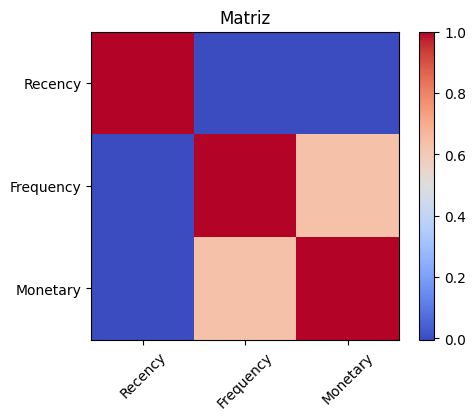

In [25]:
from datetime import datetime
import matplotlib.pyplot as plt
Hoy = datetime(2025, 4, 30)
df['Recency'] = (Hoy - pd.to_datetime(df['fecha_ultima_compra'])).dt.days
df['Frequency'] = df['compras']
df['Monetary'] = df['total_gastado']
rfm = df[['Recency', 'Frequency', 'Monetary']]
correlacion = rfm.corr()
print("\nMatriz:\n", correlacion)
plt.figure(figsize=(5, 4))
plt.imshow(correlacion, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(correlacion.columns)), correlacion.columns, rotation=45)
plt.yticks(range(len(correlacion.index)), correlacion.index)
plt.colorbar()
plt.title('Matriz')
plt.show()

P3

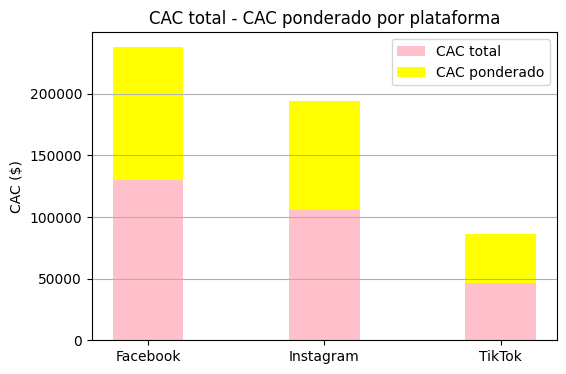

In [28]:
import numpy as np
hoy = datetime(2025, 4, 30)

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (hoy - df['fecha_ultima_compra']).dt.days
df['activo'] = df['dias_desde_ultima'] <= 180
resumen = df.groupby('plataforma').agg(
    total_clientes=('id_cliente', 'count'),
    clientes_activos=('activo', 'sum'),
    cac_total=('costo_adquisicion', 'sum')
).reset_index()
resumen['porc_activos'] = resumen['clientes_activos'] / resumen['total_clientes']
resumen['CAC_ponderado'] = resumen['cac_total'] * resumen['porc_activos']
plt.figure(figsize=(6, 4))
bar_width = 0.4
x = np.arange(len(resumen))
plt.bar(x, resumen['cac_total'], width=bar_width, label='CAC total', color='PINK')
plt.bar(x, resumen['CAC_ponderado'], width=bar_width, label='CAC ponderado', color='YELLOW', bottom=resumen['cac_total'])

plt.xticks(x, resumen['plataforma'])
plt.ylabel('CAC ($)')
plt.title('CAC total - CAC ponderado por plataforma')
plt.legend()
plt.grid(axis='y')
plt.show()

P4

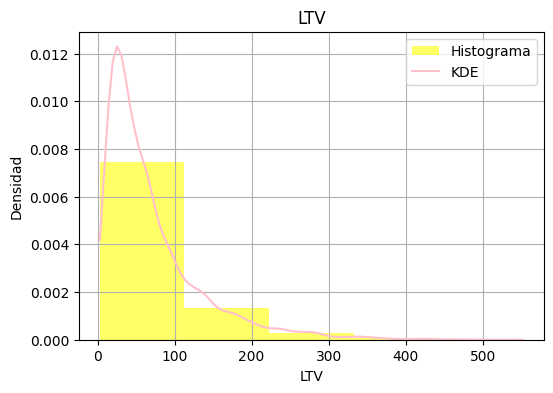

In [31]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])

df['promedio_ticket'] = df['total_gastado'] / df['compras']
df['frecuencia_mensual'] = df['compras'] / 12

def retencion(dias):
    if dias <= 90:
        return 0.80
    elif dias <= 180:
        return 0.60
    else:
        return 0.30

hoy = pd.to_datetime("2025-04-30")
df['dias_desde_ultima'] = (hoy - df['fecha_ultima_compra']).dt.days
df['tasa_retencion'] = df['dias_desde_ultima'].apply(retencion)

df['LTV'] = df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_retencion']


plt.figure(figsize=(6, 4))
counts, bins, patches = plt.hist(df['LTV'], bins=5, density=True, alpha=0.6, color='YELLOW', label='Histograma')

kde = gaussian_kde(df['LTV'])
x_vals = np.linspace(min(df['LTV']), max(df['LTV']), 100)
plt.plot(x_vals, kde(x_vals), color='PINK', label='KDE')

plt.xlabel('LTV')
plt.ylabel('Densidad')
plt.title('LTV')
plt.legend()
plt.grid(True)
plt.show()

P5

<ipython-input-33-7eef4ad0e287>:5: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



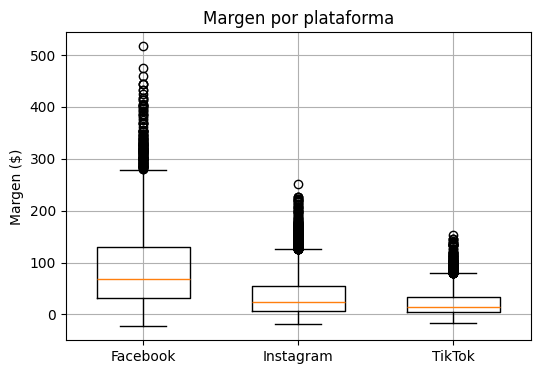

In [33]:
df['margen'] = (df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_retencion']) - df['costo_adquisicion']


plt.figure(figsize=(6, 4))
plt.boxplot([df[df['plataforma'] == plat]['margen'] for plat in df['plataforma'].unique()],
            labels=df['plataforma'].unique(), widths=0.6)

plt.ylabel('Margen ($)')
plt.title('Margen por plataforma')
plt.grid(True)
plt.show()

P6

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

cwd = os.getcwd()
file_path = os.path.join(cwd, 'clientes_segmentos (1).csv')
df = pd.read_csv(file_path)

features_for_clustering = ['edad', 'ingresos', 'promedio_ticket', 'dias_desde_ultima_compra']

if 'dias_desde_ultima_compra' not in df.columns:
    df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
    df['dias_desde_ultima_compra'] = (pd.to_datetime("2025-04-30") - df['fecha_ultima_compra']).dt.days

df_clustering = df[features_for_clustering].dropna().copy()


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df_clustering['cluster_id'] = kmeans.fit_predict(scaled_features)


df.loc[df_clustering.index, 'cluster_id'] = df_clustering['cluster_id']
df['cluster_id'] = df['cluster_id'].astype('Int64')


print(df['cluster_id'].value_counts().sort_index())


if len(features_for_clustering) >= 2 and len(features_for_clustering) <= 3:
    import plotly.express as px
    if len(features_for_clustering) == 2:
        fig = px.scatter(df_clustering, x=features_for_clustering[0], y=features_for_clustering[1], color='cluster_id', title=f'Clusters de Clientes (K={n_clusters})')
    elif len(features_for_clustering) == 3:
        fig = px.scatter_3d(df_clustering, x=features_for_clustering[0], y=features_for_clustering[1], z=features_for_clustering[2], color='cluster_id', title=f'Clusters de Clientes (K={n_clusters})')
    fig.show()

cluster_id
0    5223
1    5226
2    4551
Name: count, dtype: Int64


P7


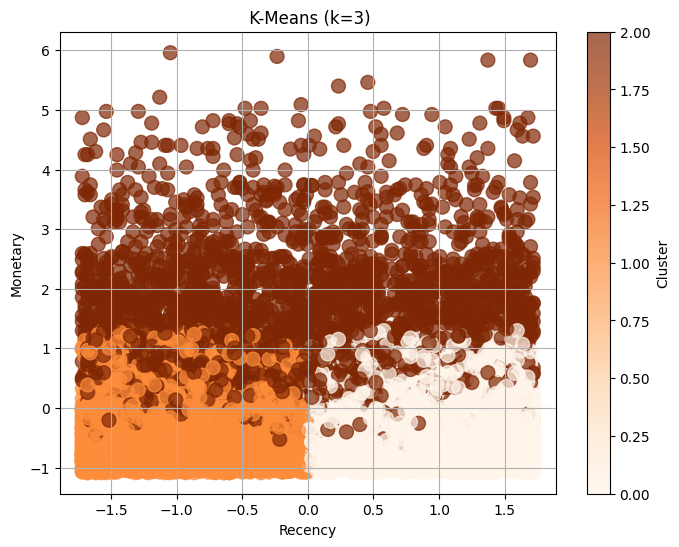

In [76]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Ensure 'fecha_ultima_compra' is in datetime format before calculation
df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])

df['dias_desde_ultima'] = (pd.to_datetime("2025-04-30") - df['fecha_ultima_compra']).dt.days
df['recency'] = df['dias_desde_ultima']
df['frequency'] = df['compras']
df['monetary'] = df['total_gastado']


scaler = StandardScaler()
df[['recency', 'frequency', 'monetary']] = scaler.fit_transform(df[['recency', 'frequency', 'monetary']])


kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['recency', 'frequency', 'monetary']])


names_and_slogans = {
    0: ("Cluster 1", "Rentabilidad alta"),
    1: ("Cluster 2", "Rentabilidad media"),
    2: ("Cluster 3", "Rentabilidad baja")
}


df['cluster_name'] = df['cluster'].map(lambda x: names_and_slogans[x][0])
df['cluster_slogan'] = df['cluster'].map(lambda x: names_and_slogans[x][1])


plt.figure(figsize=(8, 6))
plt.scatter(df['recency'], df['monetary'], c=df['cluster'], cmap='Oranges', s=100, alpha=0.7)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title(' K-Means (k=3)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

P8

In [60]:
import pandas as pd

# Assuming 'df' is already loaded and contains the necessary columns

# Recalculate 'promedio_ticket' if not present in df
if 'promedio_ticket' not in df.columns:
    df['promedio_ticket'] = df['total_gastado'] / df['compras']
# Recalculate 'frecuencia_mensual' if not present in df
if 'frecuencia_mensual' not in df.columns:
    df['frecuencia_mensual'] = df['compras'] / 12

# Recalculate 'dias_desde_ultima' if not present in df
if 'dias_desde_ultima' not in df.columns:
    df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
    df['dias_desde_ultima'] = (pd.to_datetime("2025-04-30") - df['fecha_ultima_compra']).dt.days

# Recalculate 'tasa_retencion' if not present in df
if 'tasa_retencion' not in df.columns:
    def retencion(dias):
        if dias <= 90:
            return 0.80
        elif dias <= 180:
            return 0.60
        else:
            return 0.30
    df['tasa_retencion'] = df['dias_desde_ultima'].apply(retencion)

# Recalculate 'margen' - This is the crucial step to fix the KeyError
df['margen'] = (df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_retencion']) - df['costo_adquisicion']


percentil_75_margen = df['margen'].quantile(0.75)

df['high_margin'] = df['margen'].apply(lambda x: 1 if x >= percentil_75_margen else 0)

print(df[['margen', 'high_margin']].head())

print("\nDistribución de la etiqueta 'high_margin':")
print(df['high_margin'].value_counts())

   margen  high_margin
0   111.8            1
1    46.4            0
2    39.2            0
3     8.6            0
4    49.6            0

Distribución de la etiqueta 'high_margin':
high_margin
0    11249
1     3751
Name: count, dtype: int64


In [65]:
import pandas as pd
import plotly.graph_objects as go
import os


cwd = os.getcwd()
file_path = os.path.join(cwd, 'clientes_segmentos (1).csv')
df = pd.read_csv(file_path)


top_10_percent_threshold = df['recomendaciones'].quantile(0.90)
top_advocates_df = df[df['recomendaciones'] >= top_10_percent_threshold].copy()

num_top_advocates = len(top_advocates_df)
print(f"Número de top 10% de advocates: {num_top_advocates}")


if 'cluster_id' not in df.columns:
    print("Advertencia: La columna 'cluster_id' no existe. Necesitas realizar un clustering primero.")

    df['cluster_id'] = 0
else:
    print("Columna 'cluster_id' encontrada.")


if 'total_gastado' not in df.columns:
    print("Advertencia: La columna 'total_gastado' no existe. Usando 'promedio_ticket' como aproximación.")
    df['total_gastado'] = df['promedio_ticket']
else:
    df['total_gastado'] = pd.to_numeric(df['total_gastado'], errors='coerce').fillna(0)

cluster_avg_value = df.groupby('cluster_id')['total_gastado'].mean().reset_index()
cluster_avg_value.rename(columns={'total_gastado': 'avg_value_per_customer'}, inplace=True)


top_advocates_df = pd.merge(top_advocates_df, df[['id_cliente', 'cluster_id']], on='id_cliente', how='left')


top_advocates_df = pd.merge(top_advocates_df, cluster_avg_value, on='cluster_id', how='left')


top_advocates_df['future_value_new_customers'] = top_advocates_df['avg_value_per_customer'] * 2


total_future_value_new_customers = top_advocates_df['future_value_new_customers'].sum()
print(f"Valor futuro total estimado de los nuevos clientes: ${total_future_value_new_customers:,.2f}")


cascade_data = pd.DataFrame({
    'etapa': ['Valor Actual de la Base de Clientes',
              f'Valor de los {num_top_advocates} Advocates (Top 10%)',
              f'Valor Futuro Estimado de {num_top_advocates * 2} Nuevos Clientes',
              'Valor Futuro Total Estimado'],
    'valor': [df['total_gastado'].sum(),
              top_advocates_df['total_gastado'].sum(),
              total_future_value_new_customers,
              df['total_gastado'].sum() + total_future_value_new_customers]
})


cascade_data['cambio'] = cascade_data['valor'].diff().fillna(cascade_data['valor'].iloc[0])
cascade_data.loc[0, 'cambio'] = 0

fig = go.Figure(go.Waterfall(
    name="Programa de Referidos - Estimación de Valor Futuro",
    orientation="v",
    x=cascade_data['etapa'],
    y=cascade_data['cambio'],
    textposition="outside",
    text=[f"${v:,.2f}" for v in cascade_data['valor']],

    totals={'marker': {"color": "purple"}},
    measure=['absolute', 'relative', 'relative', 'total'],
))

fig.update_layout(
    title="Valor Futuro con Programa de Referidos",
    yaxis_title="Valor (USD)"
)
fig.show()

Número de top 10% de advocates: 5950
Advertencia: La columna 'cluster_id' no existe. Necesitas realizar un clustering primero.
Valor futuro total estimado de los nuevos clientes: $1,366,285.81


P11

1. Es posible que los 150 clientes no sean representativos de todos los usuarios de YumFit. Si se eligieron a dedo o solo se incluyeron a los más activos, los resultados podrían no ser precisos.
2. La información podría no ser del todo cierta. La gente podría no decir la verdad sobre sus ingresos o podría usar varias plataformas al mismo tiempo, lo que afectaría los resultados.
3. Solo se está viendo a los clientes que siguen usando YumFit, pero no se considera a los que ya no lo usan. Sus historias también son importantes y podrían cambiar la perspectiva sobre por qué la gente deja de usar la plataforma.

Para mejorar el estudio, se podría:

1. Analizar a un grupo más grande y diverso de personas para que los resultados sean más representativos.
2. Verificar la información con varias fuentes para asegurarnos de que sea precisa. Si algo importante como los ingresos varía, buscar formas de confirmarlo para no basar todo en comentarios.